<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Tackle Titanic Dataset
</font>
</h1>

<p dir="ltr" style="direction: ltr; text-align: justify; line-height: 200%; font-family: Arial; font-size: medium">
<font face="Arial" size="4">
Here we will be tackling titanic dataset and trying to predict the survival of the passengers. First we will be doing some exploratory data analysis and some preprocessing, then we will be experimenting with different machine learning algorithms, support vector machine, random forest, XGBoost and of course neural networks on the dataset.
<p dir="ltr" style="direction: ltr; text-align: justify; line-height: 200%; font-family: Arial; font-size: medium">
</ul>
</font>


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, SMOTENC
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Check for train columns with missing values
train_data.isnull().sum(axis=0)[train_data.isnull().sum(axis=0) != 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
# Check for test columns with missing values
test_data.isnull().sum(axis=0)[test_data.isnull().sum(axis=0) != 0]

Age       86
Fare       1
Cabin    327
dtype: int64

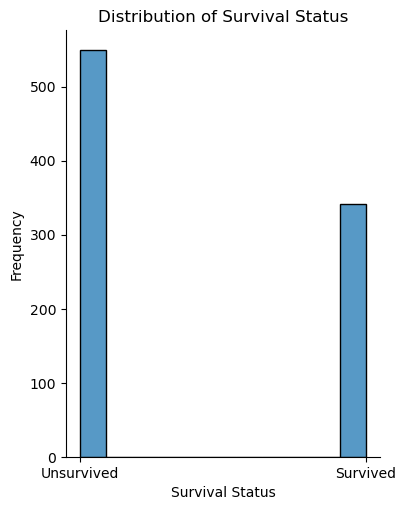

In [9]:
# Plot distribution of survival status
sns.displot(train_data, x='Survived', height=5, aspect=0.8)
plt.xlabel("Survival Status")
plt.ylabel("Frequency")
plt.title("Distribution of Survival Status")
plt.xticks([0, 1], ["Unsurvived", "Survived"])
plt.show()

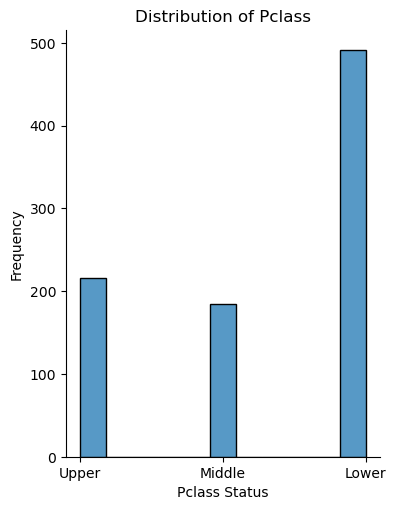

In [10]:
# Plot histogram of 'Pclass'
sns.displot(train_data, x='Pclass', height=5, aspect=0.8)
plt.xlabel("Pclass Status")
plt.ylabel("Frequency")
plt.title("Distribution of Pclass")
plt.xticks([1, 2, 3], ["Upper", "Middle", "Lower"])
plt.show()

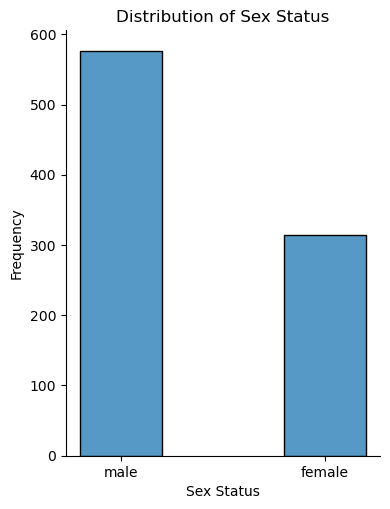

In [11]:
# Plot histogram of 'Sex'
sns.displot(train_data, x='Sex', height=5, aspect=0.8, shrink=0.4)
plt.xlabel("Sex Status")
plt.ylabel("Frequency")
plt.title("Distribution of Sex Status")
plt.show()

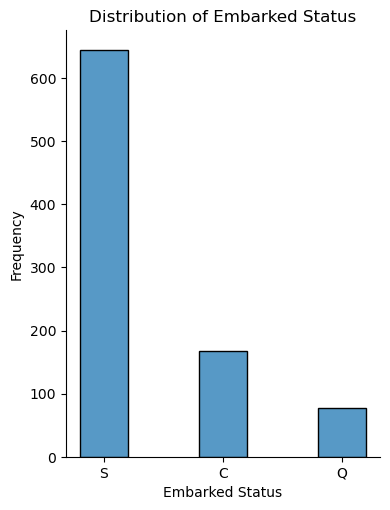

In [12]:
# Plot histogram of 'Embarked'
sns.displot(train_data, x='Embarked', height=5, aspect=0.8, shrink=0.4)
plt.xlabel("Embarked Status")
plt.ylabel("Frequency")
plt.title("Distribution of Embarked Status")
plt.show()

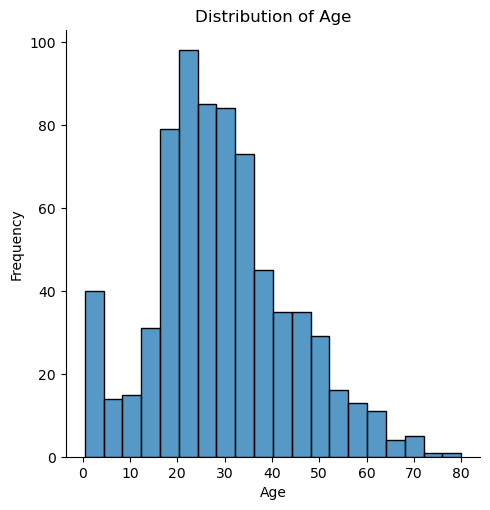

In [13]:
# Plot histogram of 'Age'
sns.displot(train_data, x='Age')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

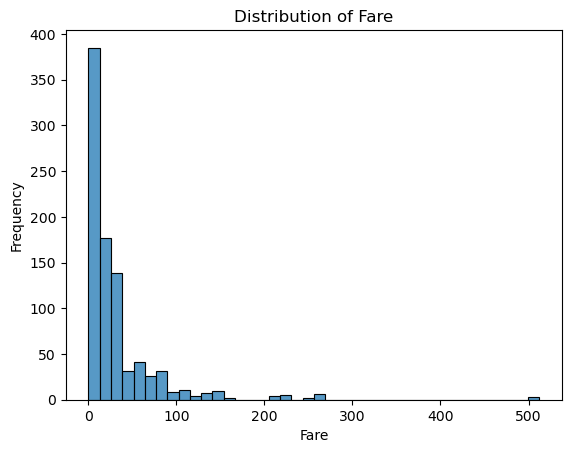

In [14]:
# Plot histogram of 'Fare'
sns.histplot(train_data, x='Fare', bins=40)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of Fare")
plt.show()

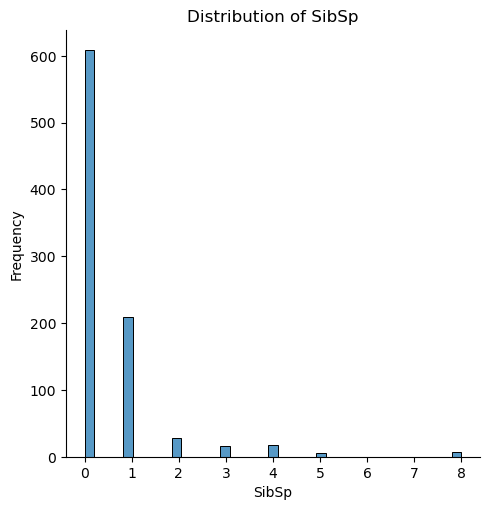

In [15]:
# Plot histogram of 'SibSp'
sns.displot(train_data, x='SibSp')
plt.xlabel("SibSp")
plt.ylabel("Frequency")
plt.title("Distribution of SibSp")
plt.show()

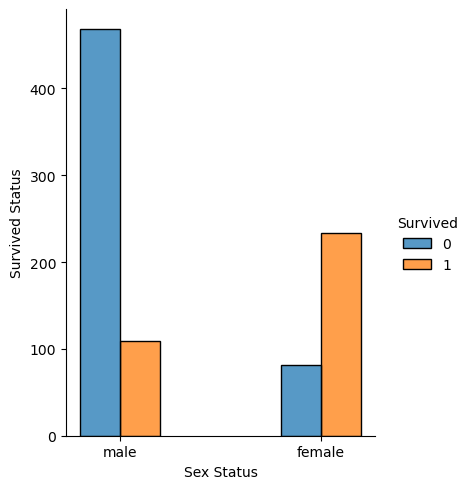

In [16]:
# Plot survival status by 'Sex'
sns.displot(
    train_data, x='Sex', hue='Survived', 
    multiple='dodge', kind='hist', height=5, aspect=0.8, shrink=0.4)

plt.xlabel("Sex Status")
plt.ylabel("Survived Status")
plt.show()

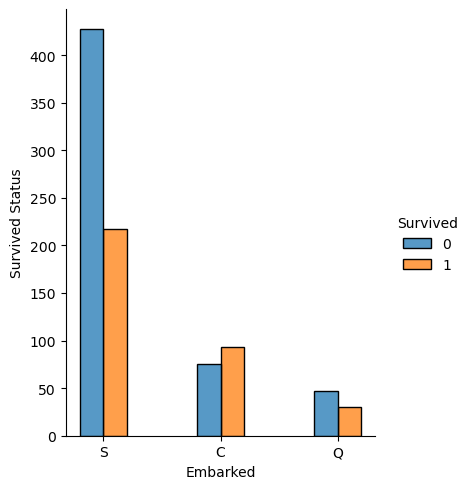

In [17]:
# Plot survival status by 'Embarked'
sns.displot(
    train_data, x='Embarked', hue='Survived', 
    multiple='dodge', height=5, aspect=0.8, shrink=0.4)

plt.xlabel("Embarked")
plt.ylabel("Survived Status")
plt.show()

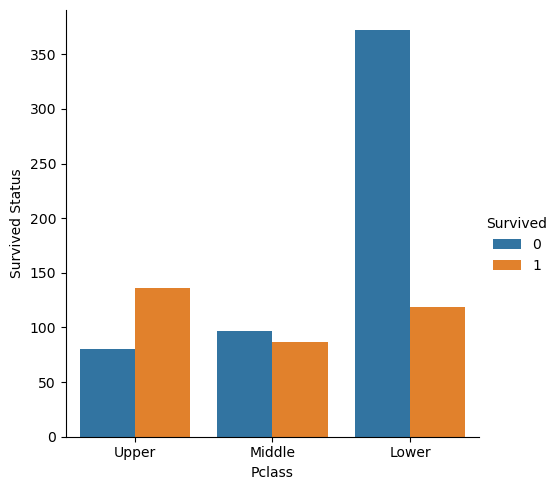

In [18]:
# Plot survival status by 'Pclass'
sns.catplot(train_data, x='Pclass', hue='Survived', kind='count')
plt.xlabel("Pclass")
plt.ylabel("Survived Status")
plt.xticks([0, 1, 2], ["Upper", "Middle", "Lower"])
plt.show()

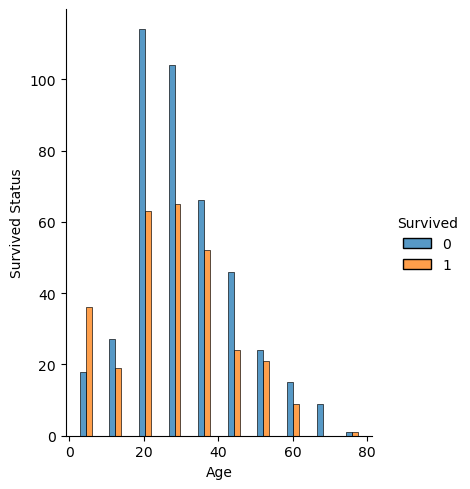

In [19]:
# Plot survival status by 'Age'
sns.displot(
    train_data, x='Age', bins=10, hue='Survived', 
    multiple='dodge', height=5, aspect=0.8, shrink=0.4)

plt.xlabel("Age")
plt.ylabel("Survived Status")
plt.show()

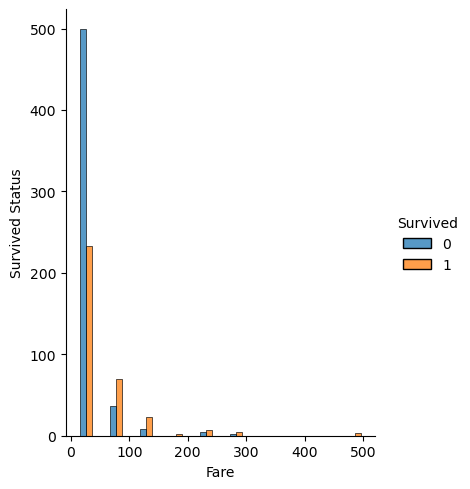

In [20]:
# Plot survival status by 'Fare'
sns.displot(
    train_data, x='Fare', bins=10, hue='Survived', 
    multiple='dodge', height=5, aspect=0.8, shrink=0.4)

plt.xlabel("Fare")
plt.ylabel("Survived Status")
plt.show()

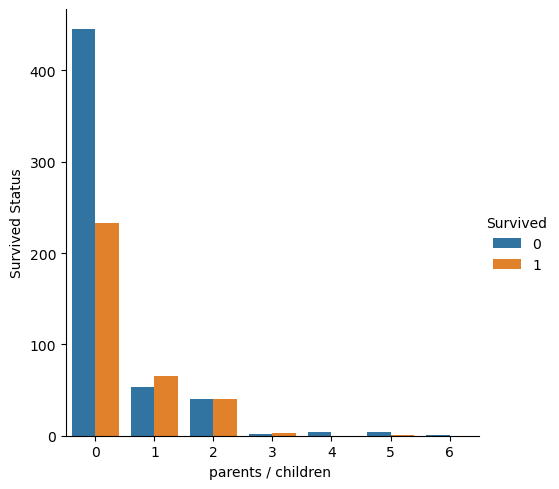

In [21]:
# Plot survival status by 'SibSp'
sns.catplot(train_data, x='Parch', hue='Survived', kind='count')
plt.xlabel("parents / children ")
plt.ylabel("Survived Status")
plt.show()

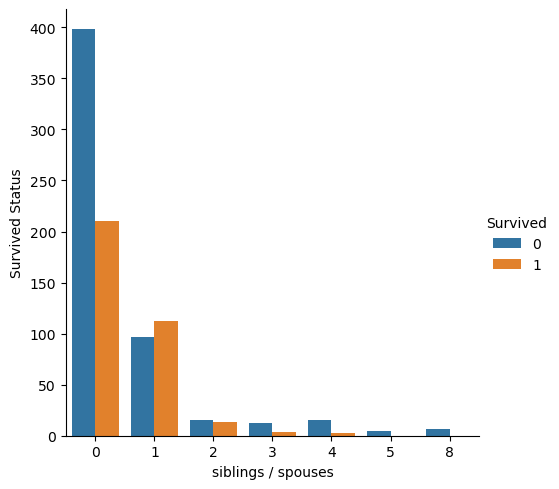

In [22]:
# Plot survival status by 'SibSp'
sns.catplot(train_data, x='SibSp', hue='Survived', kind='count')
plt.xlabel("siblings / spouses")
plt.ylabel("Survived Status")
plt.show()

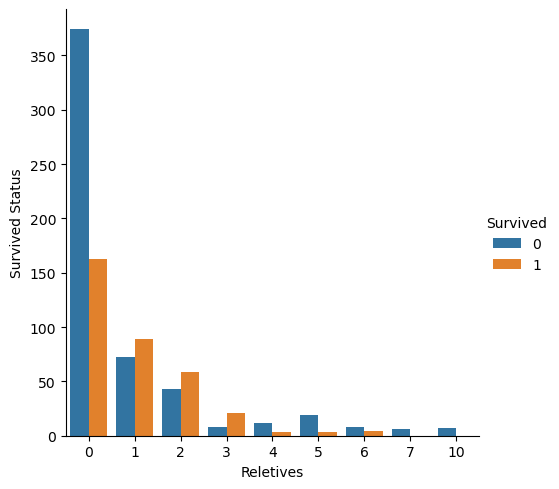

In [23]:
# Plot survival status by 'SibSp' + 'Parch'
temp_train_data = train_data.copy()
temp_train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']
sns.catplot(temp_train_data, x='Relatives', hue='Survived', kind='count')
plt.xlabel("Reletives")
plt.ylabel("Survived Status")
plt.show()

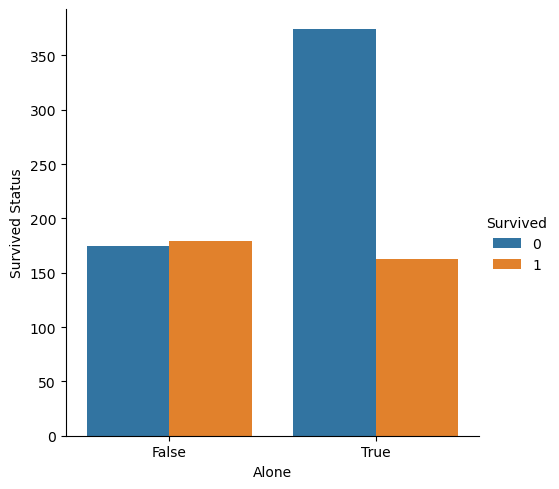

In [24]:
# Plot survival status if someone is alone
temp_train_data['Alone'] = (temp_train_data['Relatives'] == 0)
sns.catplot(temp_train_data, x='Alone', hue='Survived', kind='count')
plt.xlabel("Alone")
plt.ylabel("Survived Status")
plt.show()

In [25]:
# Check 'Cabin' values
train_data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [26]:
# Extract first letter of 'Cabin' values as CabinDesk
temp_train_data["CabinDesk"] = temp_train_data.Cabin.apply(lambda x: x[0] if x is not np.nan else "N")
temp_train_data["CabinDesk"]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: CabinDesk, Length: 891, dtype: object

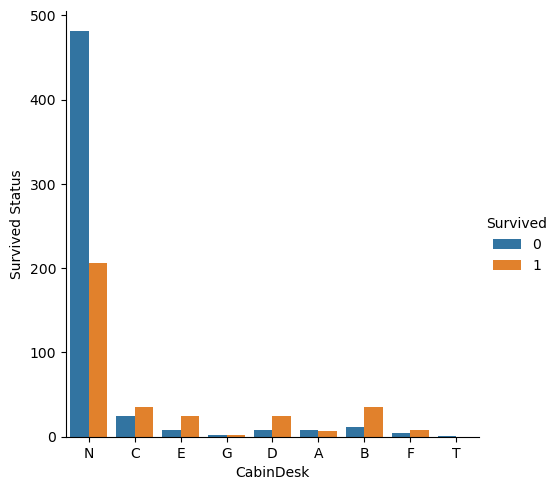

In [27]:
# Plot survival status by 'CabinDesk'
sns.catplot(temp_train_data, x='CabinDesk', hue='Survived', kind='count')
plt.xlabel("CabinDesk")
plt.ylabel("Survived Status")
plt.show()
plt.show()

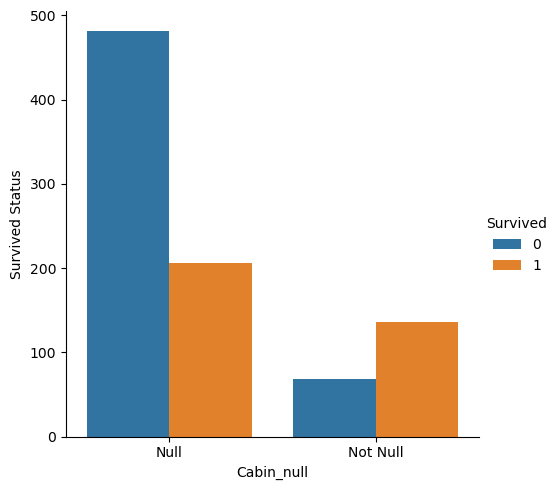

In [28]:
# Plot survival status by if 'Cabin' is null
temp_train_data['Cabin_null'] = temp_train_data.Cabin.isnull()
temp_train_data['Cabin_null'] = temp_train_data.Cabin_null.map({True: 'Null', False: 'Not Null'})
sns.catplot(temp_train_data, x='Cabin_null', hue='Survived', kind='count')
plt.xlabel("Cabin_null")
plt.ylabel("Survived Status")
plt.show()

In [29]:
# Check 'Name' values
temp_train_data.Name.head(30)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [30]:
# Extract 'Title of courtesy' from 'Name'
temp_train_data["Last name"] = temp_train_data.Name.apply(lambda x: x.split(" ")[0][:-1])
temp_train_data["Title of courtesy"] = temp_train_data.Name.apply(lambda x: x.split(" ")[1][:-1])
temp_train_data["Title of courtesy"] = temp_train_data["Title of courtesy"].apply(
    lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master', 'Dr'] else 'Other')

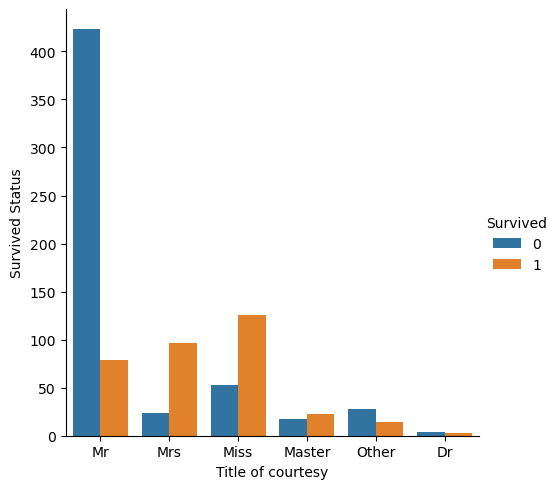

In [31]:
# Plot survival status by 'Title of courtesy'
sns.catplot(temp_train_data, x='Title of courtesy', hue='Survived', kind='count')
plt.ylabel("Survived Status")
plt.show()

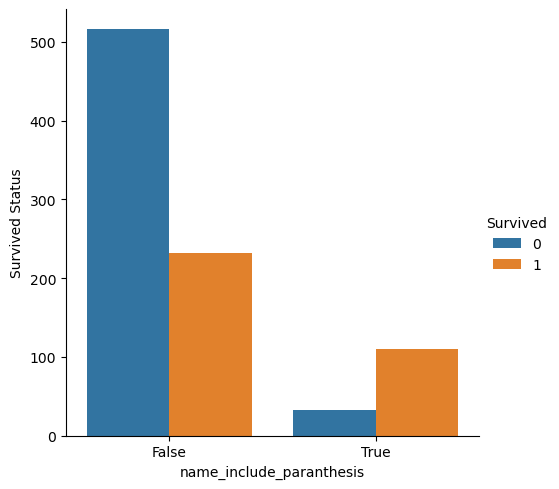

In [32]:
# Extract a new feature 'name_include_paranthesis' from 'Name'
temp_train_data["Name"] = temp_train_data.Name.astype('str')
temp_train_data["name_include_paranthesis"] = temp_train_data["Name"].apply(lambda x: ("(" in x) or (")" in x))
sns.catplot(temp_train_data, x="name_include_paranthesis", hue='Survived' ,kind='count')
plt.ylabel("Survived Status")
plt.show()

In [33]:
# Check 'Ticket' values
temp_train_data.Ticket.tail(10)

881              349257
882                7552
883    C.A./SOTON 34068
884     SOTON/OQ 392076
885              382652
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, dtype: object

## Data Preprocessing

In [34]:
def fill_missing_values(data_train, data_test):
    
    # Fill missing values of 'Embarked' with most frequent value
    emarked_mode = data_train.Embarked.mode()[0]
    data_train.Embarked.fillna(emarked_mode, inplace=True)
    data_test.Embarked.fillna(emarked_mode, inplace=True)
    
    # Fill missing values of 'Age' with grouped median value
    fill_by = data_train.groupby(['Sex', 'Pclass'])['Age'].transform('median')
    data_train.Age.fillna(fill_by, inplace=True)
    data_test.Age.fillna(fill_by, inplace=True)
    
    # Fill missing values of 'Fare' with grouped median value
    fill_by = data_train.groupby(['Pclass'])['Fare'].transform('median')
    data_train.Fare.fillna(fill_by, inplace=True)
    data_test.Fare.fillna(fill_by, inplace=True)
    
    return data_train, data_test

In [35]:
# This function extracts some new features
def extract_features(data):
        
    # Extract 'Title of courtesy' from 'Name'
    data["Title of courtesy"] = data.Name.apply(lambda x: x.split(" ")[1][:-1])
    data["Title of courtesy"] = data["Title of courtesy"].apply(
        lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master', 'Dr'] else 'Other')
    
    # Extract 'CabinDesk' from 'Cabin'    
    data["CabinDesk"] = data.Cabin.apply(lambda x: x[0] if x is not np.nan else "N")
    
    # Extract 'Cabin_null' from 'Cabin'
    data['Cabin_null'] = data.Cabin.isnull()
    
    # Extract 'name_include_paranthesis' from 'Name'
    data["Name"] = data.Name.astype('str')
    data["name_include_paranthesis"] = data["Name"].apply(lambda x: ("(" in x) or (")" in x))
    
    # Extract Ticket Frequency form 'Ticket'
    data['Ticket Frequency'] = data.groupby('Ticket')['Ticket'].transform('count')
    
    # Extract 'Relatives' from 'SibSp' and 'Parch'
    data['Relatives'] = data['SibSp'] + data['Parch']
    
    # Extract 'Alone' from 'Relatives'
    data['Alone'] = (data['Relatives'] == 0)
    
    # Extract 'AgeGroup' from 'Age'
    data['AgeGroup'] = data['Age'] // 10 * 10
    
    return data

In [36]:
# A function to encode categorical features
def encode_catergorical_features(data):

    # label-encode Sex
    data['Sex'] = data.Sex.map({'male': 1, 'female': 0})
    
    # one-hot-encode Embarked
    # dummies = pd.get_dummies(data['Embarked'], drop_first=True, prefix='Embarked')
    # data = pd.concat([data, dummies], axis=1)
    
    # one-hot-encode Title of courtesy
    # dummies = pd.get_dummies(data['Title of courtesy'], drop_first=True, prefix='Title')
    # data = pd.concat([data, dummies], axis=1)
    
    # one-hot-encode CabinDesk
    # dummies = pd.get_dummies(data['CabinDesk'], drop_first=True, prefix='Cabin')
    # data = pd.concat([data, dummies], axis=1)
    
    return data

In [37]:
# A function to Scale numerical features
def scale_numerical_features(data_train, data_test):
    
    num_attribs = ['Fare', 'Relatives', 'AgeGroup']
    scaler = MinMaxScaler()
    data_train[num_attribs] = scaler.fit_transform(data_train[num_attribs])
    data_test[num_attribs] = scaler.transform(data_test[num_attribs])
    
    return data_train, data_test

In [38]:
# A function to drop useless features
def drop_useless_features(data):
    data = data.drop([
        'PassengerId', 'Name', 'Ticket', 'Cabin_null',
        'Cabin', 'SibSp', 'Parch', 'Age', 'CabinDesk',
        'Embarked', 'Title of courtesy'], axis=1)
    return data

In [39]:
# A function to preprocess data
def preprocess(data_train, data_test):
        
    # Fill missing values
    data_train, data_test = fill_missing_values(data_train, data_test)
    
    # Extract some new features
    data_train = extract_features(data_train)
    data_test = extract_features(data_test)
    
    # Encode categorical features
    data_train = encode_catergorical_features(data_train)
    data_test = encode_catergorical_features(data_test)
    
    # Scale numerical features
    data_train, data_test = scale_numerical_features(data_train, data_test)
    
    # Drop useless features
    data_train = drop_useless_features(data_train)
    data_test = drop_useless_features(data_test)
    
    return data_train, data_test

In [40]:
# Preprocess data for training
train_prec, test_prec = preprocess(train_data.copy(), test_data.copy())
X_train = train_prec.drop('Survived', axis=1)
y_train = train_prec['Survived']

# Oversample the training data
# sm = ADASYN(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)

## Modleing

In [41]:
# SVM
param_grid = [{
    'kernel': ['linear', 'rbf'], 
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}]

svm_clf = SVC()
svm_grid_search = GridSearchCV(svm_clf, param_grid, cv=StratifiedKFold(5), refit=True)
svm_grid_search.fit(X_train, y_train)
print("SVM best parameters:", svm_grid_search.best_params_)
print("SVM best score:", svm_grid_search.best_score_)

SVM best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVM best score: 0.8114870378507313


In [42]:
# Random Forest
param_grid = [{
    'n_estimators': [50, 100, 150, 200, 300, 500, 1000, 1500], 
    'max_depth': [3, 4, 6, 8, 10],
}]

forest_clf = RandomForestClassifier(random_state=42)
forest_grid_search = GridSearchCV(forest_clf, param_grid, cv=StratifiedKFold(5), refit=True)
forest_grid_search.fit(X_train, y_train)
print("Random Forest best parameters:", forest_grid_search.best_params_)
print("Random Forest best score:", forest_grid_search.best_score_)

Random Forest best parameters: {'max_depth': 6, 'n_estimators': 1000}
Random Forest best score: 0.8305567760969179


In [43]:
# XGBoost
param_grid = [{
    'n_estimators': [40, 50, 60, 70, 80, 100, 120, 200, 500], 
    'max_depth': [1, 2, 3, 4, 5]
}]

xgb_clf = XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(xgb_clf, param_grid, cv=StratifiedKFold(5), refit=True)
xgb_grid_search.fit(X_train, y_train)
print("XGboost best parameters:", xgb_grid_search.best_params_)
print("XGbosst best score:", xgb_grid_search.best_score_)

XGboost best parameters: {'max_depth': 5, 'n_estimators': 40}
XGbosst best score: 0.8429037725189881


In [44]:
# Neural Network
param_grid = [{
    'hidden_layer_sizes': [(50,), (100,), (200,), (300,)], 
    'activation': ['logistic', 'tanh', 'relu']
}]

mlp_clf = MLPClassifier(random_state=42)
mlp_grid_search = GridSearchCV(mlp_clf, param_grid, cv=StratifiedKFold(5), refit=True)
mlp_grid_search.fit(X_train, y_train)
print("Neural Network best parameters:", mlp_grid_search.best_params_)
print("Neural Network best score:", mlp_grid_search.best_score_)

Neural Network best parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,)}
Neural Network best score: 0.8193145439708743


## Predict test datset

In [45]:
# Prepare test data
X_test = test_prec.values

# Prepare best model
final_model = forest_grid_search.best_estimator_

# Predict
y_test = final_model.predict(X_test)

# Write predictions to csv file 
test_data['Survived'] = y_test
test_data[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)
test_data[['PassengerId', 'Survived']].head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [46]:
test_prec

,Pclass,Sex,Fare,name_include_paranthesis,Ticket Frequency,Relatives,Alone,AgeGroup
0,3,1,0.015282,False,1,0.0,True,0.375
1,3,0,0.013663,True,1,0.1,False,0.500
2,2,1,0.018909,False,1,0.0,True,0.750
3,3,1,0.016908,False,1,0.0,True,0.250
4,3,0,0.023984,True,1,0.2,False,0.250
...,...,...,...,...,...,...,...,...
413,3,1,0.015713,False,1,0.0,True,0.375
414,1,0,0.212559,False,1,0.0,True,0.375
415,3,1,0.014151,False,1,0.0,True,0.375
416,3,1,0.015713,False,1,0.0,True,0.250
